# Tools for Statistical Analysis

## Authors
* **Alireza Arbabi**
* **Hadi Babalou**
* **Ali Padyav**

## Table of Contents

- [Introduction](#introduction)
- [Monte Carlo Simulation](#monte-carlo-simulation)
    - [Pi Calculation](#pi-calculation)
    - [Mensch Game](#mensch-game)
- [Central Limit Theorem](#central-limit-theorem)
- [Hypothese Testing](#hypothese-testing)
    - [Unfair Coin](#unfair-coin)
    - [Job Placement](#job-placement)
- [Questions](#questions)
    - [Question 1](#q1)
    - [Question 2](#q2)
    - [Question 3](#q3)
    - [Question 4](#q4)
    - [Question 5](#q5)
    - [Question 6](#q6)

## Introduction

In this assignment, we are going to get acquainted with and implement some tools for
statistical analysis. These tools could come to your help in your future research and projects.

## Setting Up the Environment

In [ ]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install tqdm
!pip install scipy

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm
from scipy.optimize import curve_fit
from scipy.stats import norm, t
from scipy.stats import ttest_ind, binomtest
import random
import math

## Monte Carlo Simulation

In this section, we will learn more about Monte Carlo Simulation and understand how it can help us to model and analyze complex systems, where analytical or closed-form solutions are difficult.

### Pi Calculation

In this part, we are going to use Monte Carlo Simulation to calculate the value of Pi. The idea is to randomly generate points within a square and determine how many fall in a circle inscribed by the square. By comparing the points inside the circle to the total number of points we can approximate the Pi number.

In [3]:
def calculate_pi(n_points: int) -> float:
    #Calculate the value of pi using the Monte Carlo method.
    n_inside = 0
    for _ in range(n_points):
        x = random.random()
        y = random.random()
        if x**2 + y**2 <= 1:
            n_inside += 1
    return 4 * n_inside / n_points

In [159]:
def plot_pi(n_rounds: int, n_points: int) -> None:
	pi_values = n_rounds * [0]
	error_values = n_rounds * [0]
	for idx in tqdm.tqdm(range(n_rounds)):
		pi_values[idx] = calculate_pi(n_points)
		error_values[idx] = np.abs(np.pi - pi_values[idx])
	sns.histplot(pi_values, kde=True, color='deepskyblue', alpha=0.5, label='Pi values', stat='probability')
	# Fit a normal distribution to the data
	mu, std = norm.fit(pi_values)
	x = np.linspace(mu - 4*std, mu + 4*std, 100)
	p = norm.pdf(x, mu, std)	
	# TODO: scale the normal distribution to the data
	p /= np.sqrt(n_points)

	plt.plot(x, p, color='m', label='Normal distribution')    
	plt.ylabel('Density')
	plt.title('Distribution of pi values')
	plt.legend()
	plt.show()
	pi_mean = np.mean(pi_values)
	pi_std = np.std(pi_values)
	error_mean = np.mean(error_values)
	error_std = np.std(error_values)
	print(f'Mean of pi values:                      {pi_mean:0.7f}')
	print(f'Standard deviation of pi values:        {pi_std:0.7f}')
	print(f'Mean of error values:                   {error_mean:0.7f}')
	print(f'Standard deviation of error values:     {error_std}')

100%|██████████| 100/100 [00:00<00:00, 8404.24it/s]


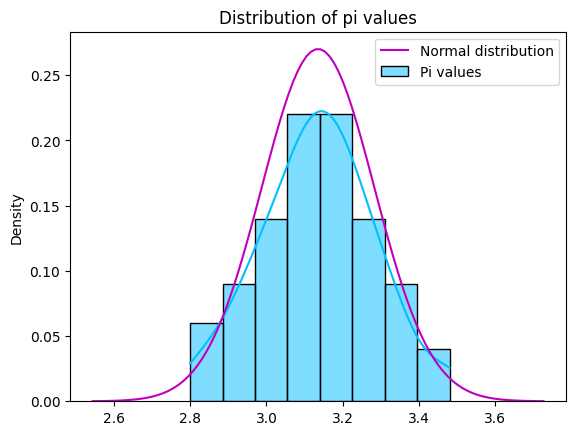

Mean of pi values:                      3.1352000
Standard deviation of pi values:        0.1477057
Mean of error values:                   0.1172319
Standard deviation of error values:     0.0900806230288843


In [160]:
plot_pi(n_rounds=100, n_points=100)

100%|██████████| 100/100 [00:00<00:00, 1247.53it/s]

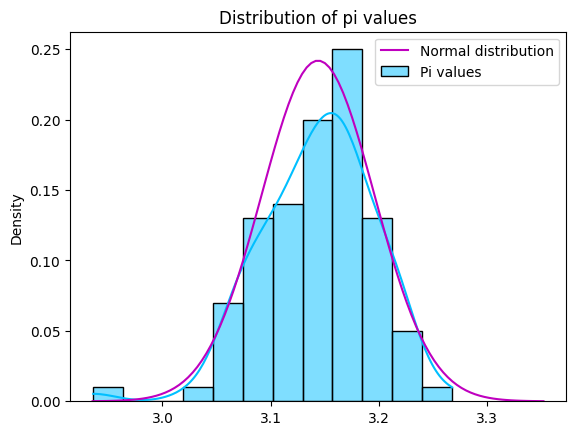

Mean of pi values:                      3.1439600
Standard deviation of pi values:        0.0521398
Mean of error values:                   0.0412726
Standard deviation of error values:     0.031948962933306374


In [161]:
plot_pi(n_rounds=100, n_points=1000)

100%|██████████| 100/100 [00:00<00:00, 155.39it/s]


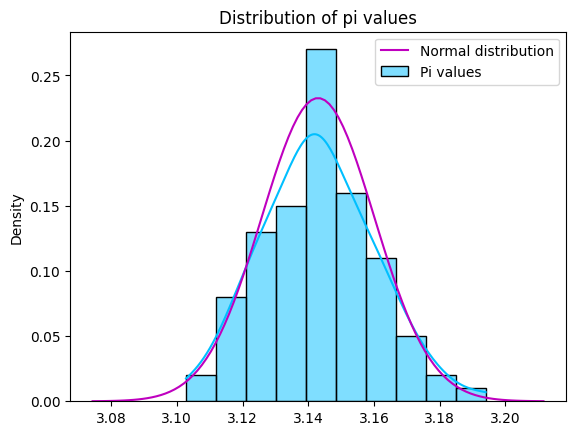

Mean of pi values:                      3.1429800
Standard deviation of pi values:        0.0171523
Mean of error values:                   0.0135400
Standard deviation of error values:     0.01062054283273291


In [162]:
plot_pi(n_rounds=100, n_points=10000)

  2%|▏         | 2/100 [00:00<00:05, 17.71it/s]

100%|██████████| 100/100 [00:05<00:00, 19.74it/s]


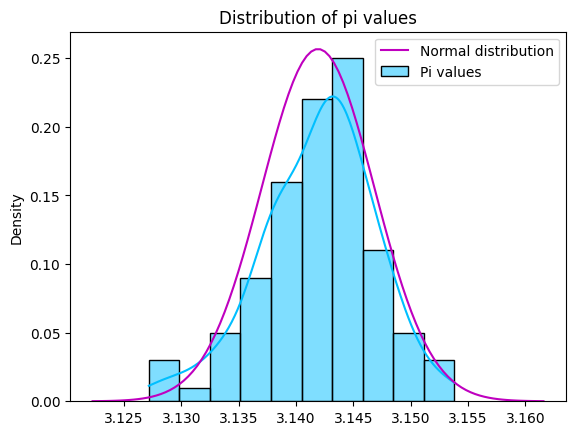

Mean of pi values:                      3.1419156
Standard deviation of pi values:        0.0049152
Mean of error values:                   0.0038849
Standard deviation of error values:     0.0030283601715319856


In [163]:
plot_pi(n_rounds=100, n_points=100000)

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:49<00:00,  2.01it/s]


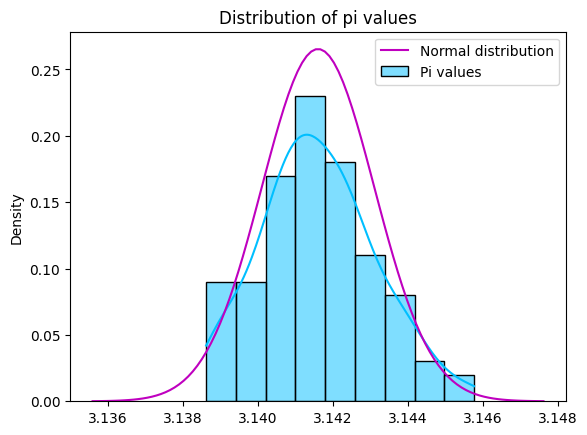

Mean of pi values:                      3.1416093
Standard deviation of pi values:        0.0015035
Mean of error values:                   0.0012048
Standard deviation of error values:     0.0008996448810808872


In [164]:
plot_pi(n_rounds=100, n_points=1000000)

100%|██████████| 25/25 [02:00<00:00,  4.81s/it]


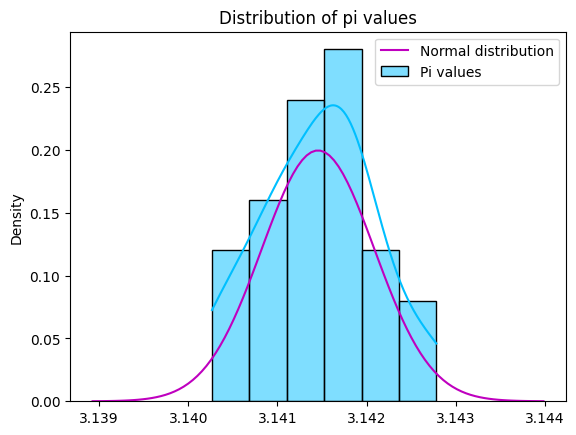

Mean of pi values:                      3.1414547
Standard deviation of pi values:        0.0006322
Mean of error values:                   0.0005166
Standard deviation of error values:     0.000389672765098387


In [165]:
plot_pi(n_rounds=25, n_points=10000000)

/tmp/ipykernel_11343/2144802263.py:5: RuntimeWarning: divide by zero encountered in divide
  return coeff1*1/(x**11) + coeff2*1/(x**10) + coeff3*1/(x**9) + coeff4*1/(x**8) + coeff5*1/(x**7) + coeff6*1/(x**6) + coeff7*1/(x**5) + coeff8*1/(x**4) + coeff9*1/(x**3) + coeff10*1/(x**2) + coeff11*1/x + coeff12
/tmp/ipykernel_11343/2144802263.py:5: RuntimeWarning: invalid value encountered in add
  return coeff1*1/(x**11) + coeff2*1/(x**10) + coeff3*1/(x**9) + coeff4*1/(x**8) + coeff5*1/(x**7) + coeff6*1/(x**6) + coeff7*1/(x**5) + coeff8*1/(x**4) + coeff9*1/(x**3) + coeff10*1/(x**2) + coeff11*1/x + coeff12


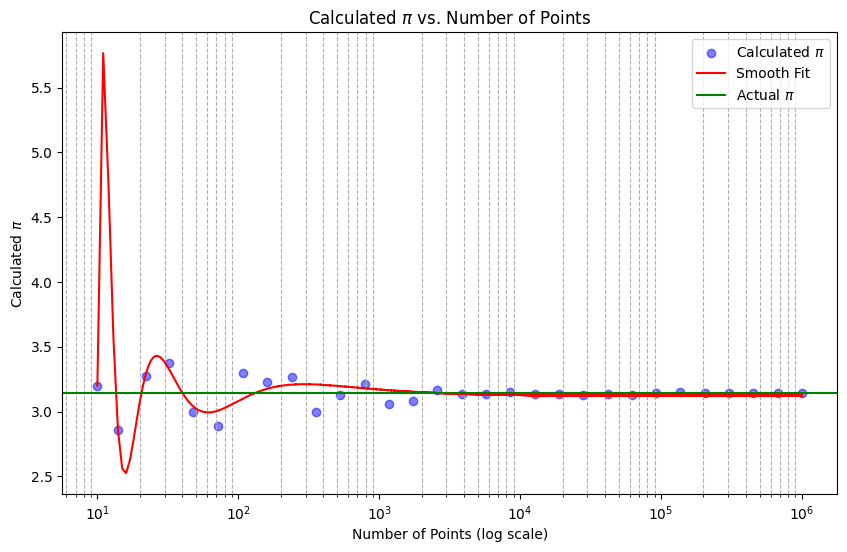

In [91]:
def damped_wave(x, a, omega1, omega2, phi1, phi2, c):
    return a * np.exp(-c * x) * (np.sin(omega1 * x + phi1) + np.cos(omega2 * x + phi2))

def damped_wave1(x, coeff1, coeff2, coeff3, coeff4, coeff5, coeff6, coeff7, coeff8, coeff9, coeff10, coeff11, coeff12):
    return coeff1*1/(x**11) + coeff2*1/(x**10) + coeff3*1/(x**9) + coeff4*1/(x**8) + coeff5*1/(x**7) + coeff6*1/(x**6) + coeff7*1/(x**5) + coeff8*1/(x**4) + coeff9*1/(x**3) + coeff10*1/(x**2) + coeff11*1/x + coeff12

def plot_pi_versus_n_points(max_points: int) -> None:
    n_points = np.logspace(1, np.log10(max_points), num=30, dtype=int)
    pi_values = [calculate_pi(n) for n in n_points]

    p0 = [2, 0.5, 0.5, 0.2, 0.2, 0.1, 0.1, 0.05, 0.05, 0.02, 0.02, 0.01]
    popt, pcov = curve_fit(damped_wave1, n_points, pi_values, maxfev=max_points, p0=p0)
    smooth_x = np.logspace(1, np.log10(max_points), num=max_points, dtype=int)
    smooth_y = damped_wave1(smooth_x, *popt)

    plt.figure(figsize=(10, 6))
    plt.scatter(n_points, pi_values, color='blue', label='Calculated $\pi$', alpha=0.5)
    plt.plot(smooth_x, smooth_y, 'r-', label='Smooth Fit')
    plt.axhline(y=np.pi, color='g', linestyle='-', label='Actual $\pi$')
    plt.xscale('log')
    plt.title('Calculated $\pi$ vs. Number of Points')
    plt.xlabel('Number of Points (log scale)')
    plt.ylabel('Calculated $\pi$')
    plt.legend()
    plt.grid(True, ls="--", which='minor')
    plt.show()

plot_pi_versus_n_points(1000000)

#### Analysis

As we can see, we can use the Monte Carlo Simulation to estimate the value of Pi. The more points we use, the more accurate the result will be. However, the accuracy of the result is not only dependent on the number of points, but also on the distribution of the points. If the points are not distributed uniformly, the result will not be accurate.

### Mensch Game

Mensch is a very old German game, which is also popular in our country. You can learn more about Mensch and its rules in [this](https://en.wikipedia.org/wiki/Mensch_%C3%A4rgere_Dich_nicht) link.  
We are going to analyze the simpler version of this game in which every player only has one piece in the game. So basically, every player only rolls dice in his turns and moves his piece. So, everything is purely based on chance. We want to calculate the probability of winning for
each of the 1st, 2nd, 3rd, and 4th players in this game.

#### Game Simulation

In [10]:
def simulate_mensch(board_size=40, num_players=4, num_pieces=4, dice_sides=6):
    init_positions = [idx for idx in range(0, board_size, board_size//num_players)]
    positions = num_players * [-1]
    turn = 1
    player = 0
    while True:
        roll = random.randint(1, dice_sides)
        if positions[player] == -1:
            if roll == 6:
                positions[player] = init_positions[player]
        else:
            temp_new_position = positions[player] + roll
            if temp_new_position > board_size + init_positions[player] - 1:
                if temp_new_position <= board_size + init_positions[player] + num_pieces - 1:
                    return player, turn
            else:
                positions[player] = temp_new_position
                for idx, pos in enumerate(positions):
                    if idx != player and pos % board_size == positions[player] % board_size:
                        if pos != init_positions[idx]:
                            positions[idx] = -1
        if roll != 6:
            player = (player + 1) % num_players
        turn += 1
        

In [97]:
def run_mensch_simulation(n_rounds=10000, board_size=40, num_players=4, num_pieces=1, dice_sides=6):
    results = [simulate_mensch(board_size=board_size, num_players=num_players, num_pieces=num_pieces, dice_sides=dice_sides) for _ in tqdm.tqdm(range(n_rounds))]
    results_df = pd.DataFrame(results, columns=['winner', 'turn'])
    return results_df

results_df = run_mensch_simulation(n_rounds=100000, num_pieces=1)

100%|██████████| 100000/100000 [00:09<00:00, 10510.63it/s]


#### Distribution of the Game Turns

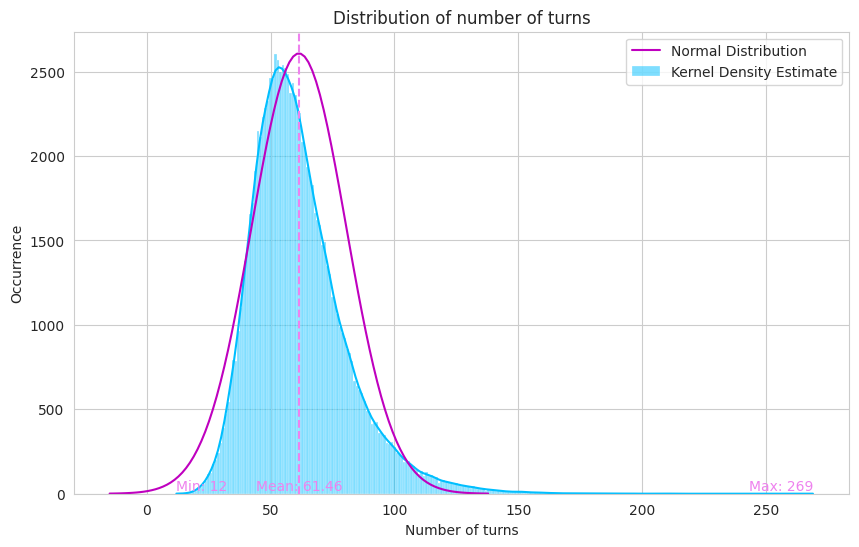

In [98]:
def show_turns_distribution(results_df):
    plt.figure(figsize=(10, 6))
    sns.histplot(results_df['turn'], kde=True, color='deepskyblue', alpha=0.5, label='Kernel Density Estimate', discrete=True)
    plt.axvline(results_df['turn'].mean(), color='violet', alpha=1, linestyle='dashed')
    mu, std = results_df['turn'].mean(), results_df['turn'].std()
    x = np.linspace(mu - 4*std, mu + 4*std, 100)
    p = norm.pdf(x, mu, std)
    p = p * max(results_df['turn'].value_counts()) / max(p)
    plt.text(mu, 0, f'Mean: {mu:0.2f}', ha='center', va='bottom', color='violet')
    plt.text(results_df['turn'].min(), 0, f'Min: {results_df["turn"].min()}', ha='left', va='bottom', color='violet')
    plt.text(results_df['turn'].max(), 0, f'Max: {results_df["turn"].max()}', ha='right', va='bottom', color='violet')
    plt.plot(x, p, label='Normal Distribution', color='m')
    plt.xlabel('Number of turns')
    plt.ylabel('Occurrence')
    plt.title('Distribution of number of turns')
    plt.legend()
    plt.show()

show_turns_distribution(results_df)

#### Distribution of the Winners

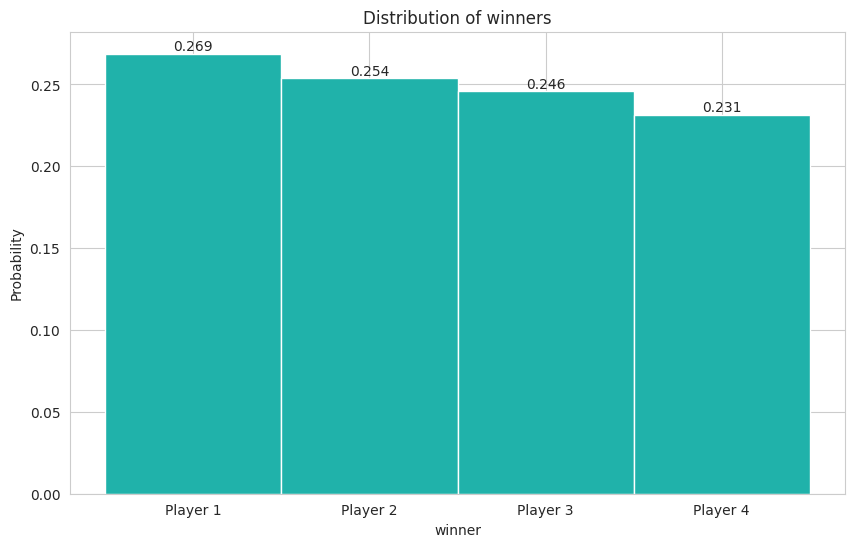

In [99]:
def show_winner_distribution(results_df, num_players=4):
    plt.figure(figsize=(10, 6))
    sns.histplot(results_df['winner'], color='lightseagreen', alpha=1, discrete=True, stat='probability')
    # only show descrete values on the x-axis
    plt.xticks(np.arange(num_players), [f'Player {idx+1}' for idx in range(num_players)])
    for idx, count in results_df['winner'].value_counts(normalize=True).items():
        plt.text(idx, count, f'{count:.3f}', ha='center', va='bottom')
    plt.ylabel('Probability')
    plt.title('Distribution of winners')
    plt.show()

show_winner_distribution(results_df)

#### Analysis

As we can see from the results, the probability of winning for all players is almost the same. This is because the game is purely based on chance and there is no strategy involved. So, the probability of winning for each player is almost 0.25.  
But, as we can see, the probability of winning for the 1st player is a little bit higher than the others. This is because the 1st player has the first turn and has a little bit more chance to win the game. This is also the reason why the probability of winning for the 4th player is a little bit lower than the others. By other words, in this game, the order of the players is important and thus, the prior players have a little bit more chance to win the game.  

We can decrease the effect of the order of the players by increasing the `board_size`, so the game will be longer and the effect of the order of the players will be decreased.

100%|██████████| 10000/10000 [01:16<00:00, 130.32it/s]


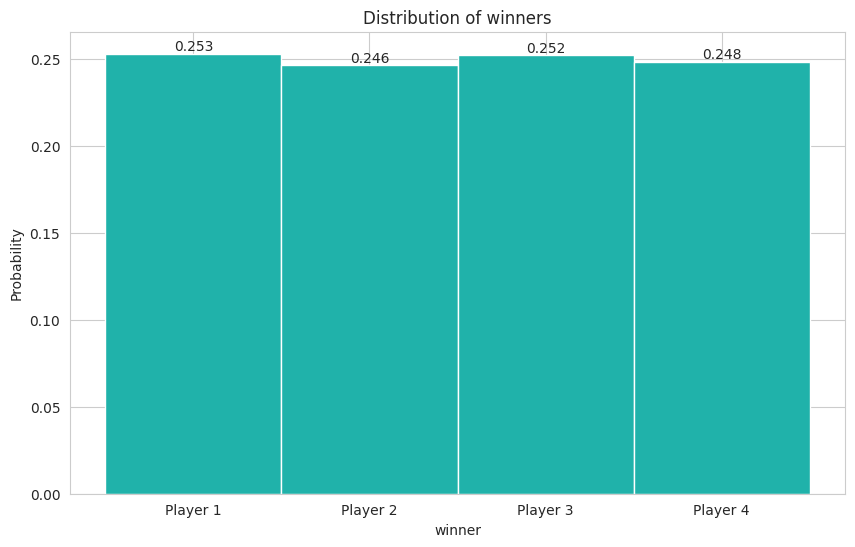

In [103]:
high_board_size_results_df = run_mensch_simulation(n_rounds=10000, board_size=4000)
show_winner_distribution(high_board_size_results_df)

100%|██████████| 50000/50000 [06:15<00:00, 133.13it/s]


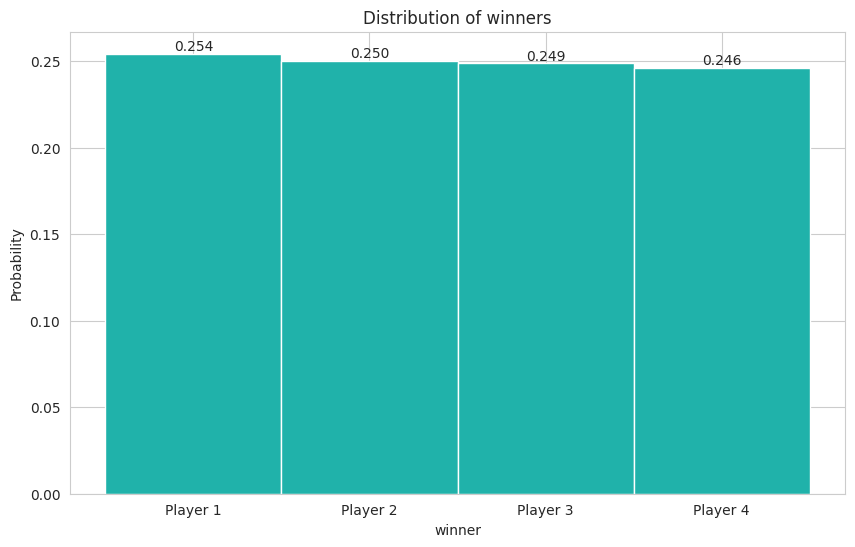

In [104]:
high_board_size_results_df = run_mensch_simulation(n_rounds=50000, board_size=4000)
show_winner_distribution(high_board_size_results_df)

## Central Limit Theorem

In this section, we first choose 3 different distributions and take samples from them, then we observe and evaluate the central limit theorem on the samples' mean.

### Distribution 1: Exponential Distribution

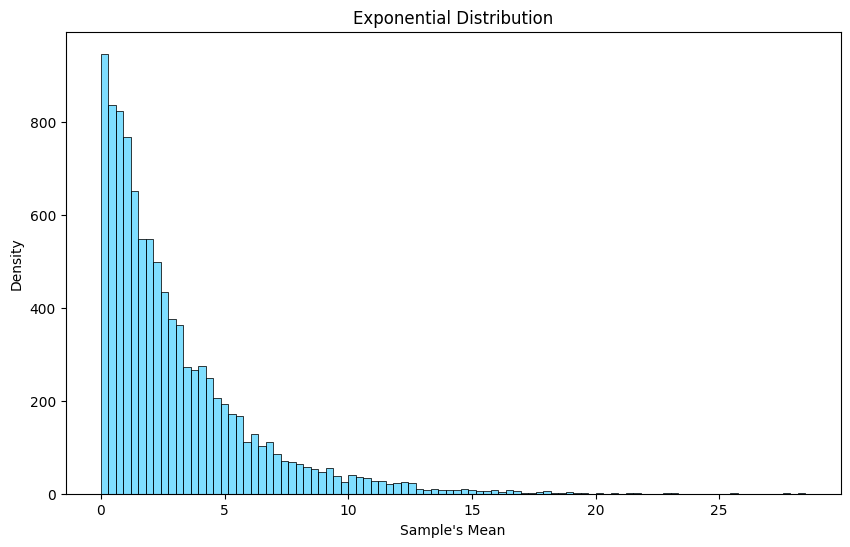

In [ ]:
exp_sample = np.random.exponential(scale=3, size=10000)
plt.figure(figsize=(10, 6))
sns.histplot(exp_sample, kde=False, color='deepskyblue', alpha=0.5)
plt.xlabel('Sample\'s Mean')
plt.ylabel('Density')
plt.title('Exponential Distribution')
plt.show()

In [ ]:
def exponential_distribution_mean_sampling(sampling_rate: int, sample_size: int):
    mean_samples = []

    for i in range(0, sampling_rate):
        exp_sample = np.random.exponential(scale=3, size=sample_size)
        exp_sample_mean = exp_sample.mean()
        mean_samples.append(exp_sample_mean)
        
    plt.figure(figsize=(10, 6))
    y, x, _ = plt.hist(mean_samples, color='deepskyblue', alpha=0.5, density=True, label='Sample\'s Mean')
    plt.xlabel('Sample\'s Mean')
    plt.ylabel('Density')
    plt.title('Distribution of the Exponential Distribution Sample\'s mean')
    
    # Fit a normal distribution curve
    mu, std = norm.fit(mean_samples)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    p_scaled = p * (y.max()/max(p))
    plt.plot(x, p_scaled, color='m', label='Normal Distribution Fit')
    plt.legend()
    plt.show()

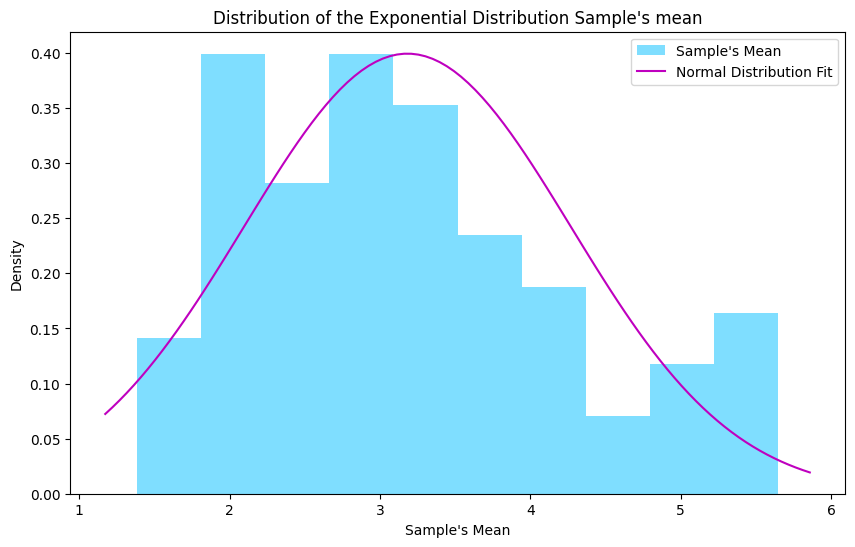

In [ ]:
SAMPLING_RATE = 100
SAMPLE_SIZE = 10
exponential_distribution_mean_sampling(SAMPLING_RATE, SAMPLE_SIZE)

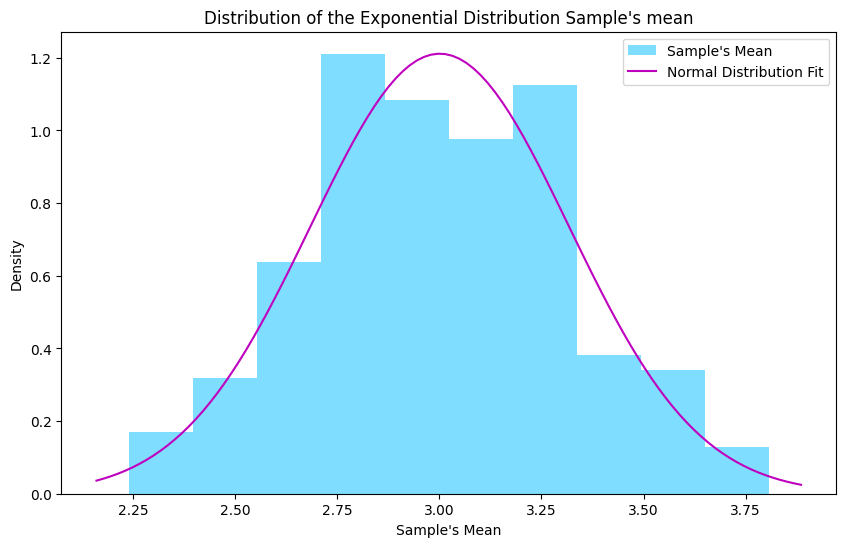

In [ ]:
SAMPLING_RATE = 300
SAMPLE_SIZE = 100
exponential_distribution_mean_sampling(SAMPLING_RATE, SAMPLE_SIZE)

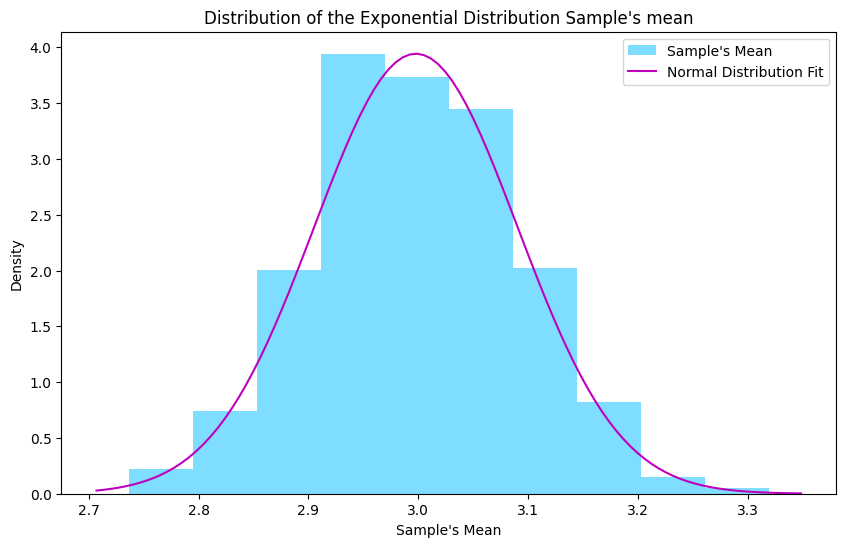

In [ ]:
SAMPLING_RATE = 1000
SAMPLE_SIZE = 1000
exponential_distribution_mean_sampling(SAMPLING_RATE, SAMPLE_SIZE)

### Distribution 2: Pareto Distribution

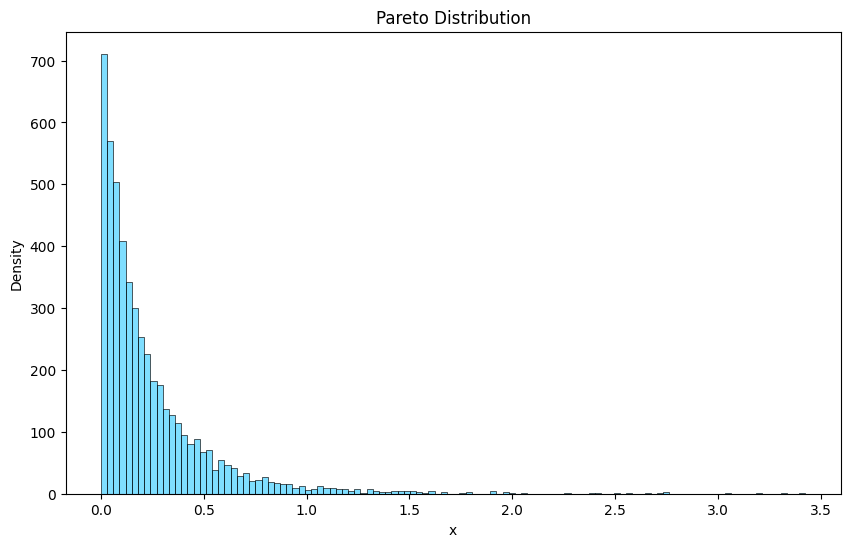

In [ ]:
pareto_sample = np.random.pareto(a=5, size=5000)
plt.figure(figsize=(10, 6))
sns.histplot(pareto_sample, kde=False, color='deepskyblue', alpha=0.5)
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Pareto Distribution')
plt.show()

In [ ]:
def pareto_distribution_mean_sampling(sampling_rate: int, sample_size: int):
    mean_samples = []

    for i in range(0, sampling_rate):
        exp_sample = np.random.pareto(a=5, size=sample_size)
        exp_sample_mean = exp_sample.mean()
        mean_samples.append(exp_sample_mean)
        
    plt.figure(figsize=(10, 6))
    y, x, _ = plt.hist(mean_samples, color='deepskyblue', alpha=0.5, density=True, label='Sample\'s Mean')
    plt.xlabel('Sample\'s Mean')
    plt.ylabel('Density')
    plt.title('Distribution of the Pareto distribution Sample\'s mean')
    
    
    # Fit a normal distribution curve
    mu, std = norm.fit(mean_samples)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    p_scaled = p * (y.max()/max(p))
    plt.plot(x, p_scaled, color='m', label='Normal Distribution Fit')
    
    plt.show()

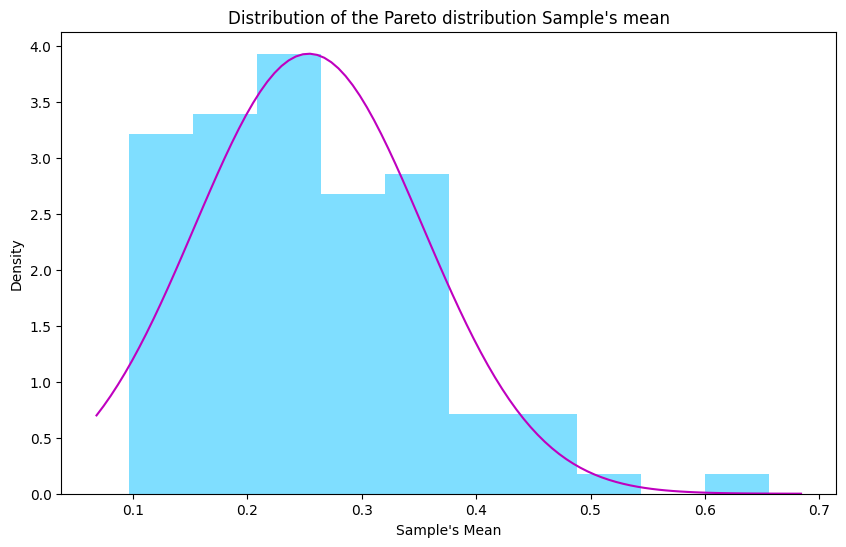

In [ ]:
SAMPLING_RATE = 100
SAMPLE_SIZE = 10
pareto_distribution_mean_sampling(SAMPLING_RATE, SAMPLE_SIZE)

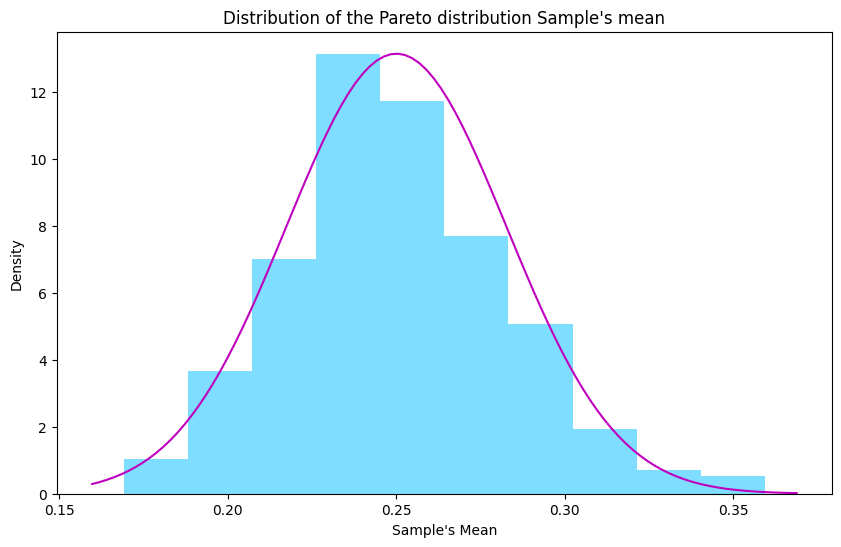

In [ ]:
SAMPLING_RATE = 300
SAMPLE_SIZE = 100
pareto_distribution_mean_sampling(SAMPLING_RATE, SAMPLE_SIZE)

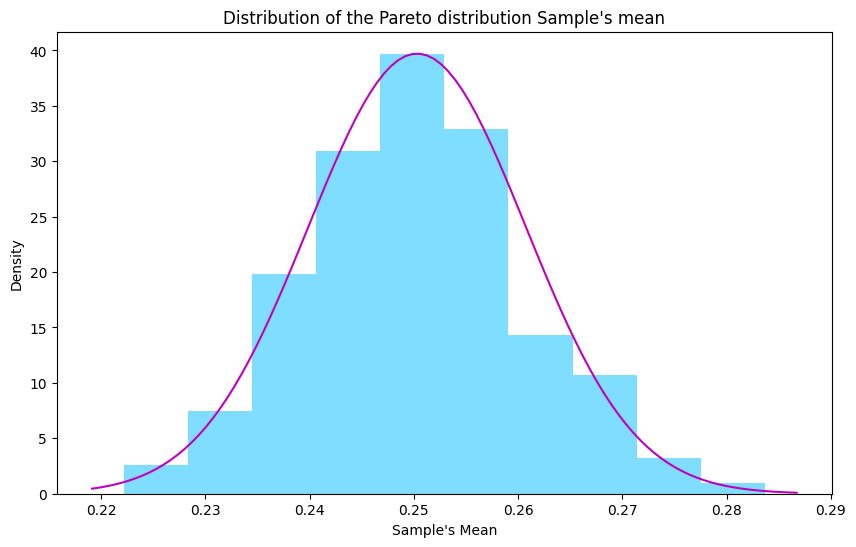

In [ ]:
SAMPLING_RATE = 500
SAMPLE_SIZE = 1000
pareto_distribution_mean_sampling(SAMPLING_RATE, SAMPLE_SIZE)

### Distribution 3: Beta Distribution

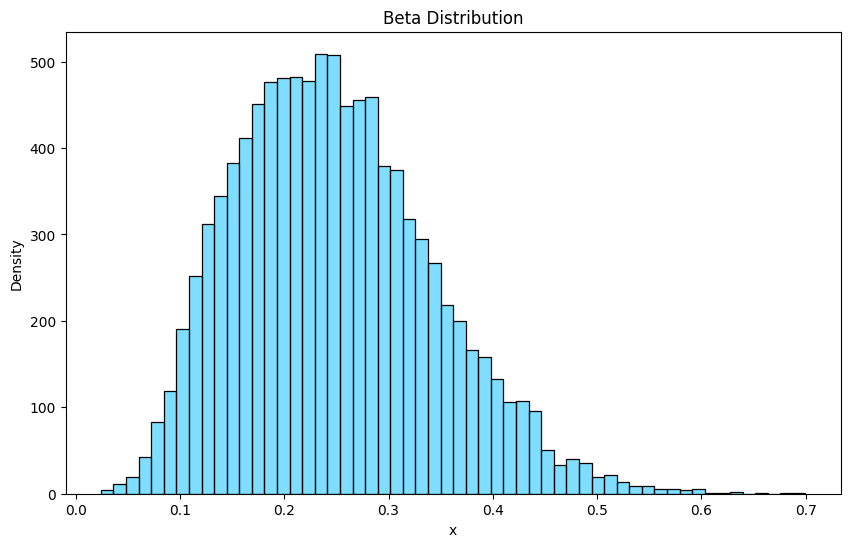

In [ ]:
beta_sample = np.random.beta(a=5, b=15, size=10000)
plt.figure(figsize=(10, 6))
sns.histplot(beta_sample, kde=False, color='deepskyblue', alpha=0.5)
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Beta Distribution')
plt.show()

In [ ]:
def beta_distribution_mean_sampling(sampling_rate: int, sample_size: int):
    mean_samples = []

    for i in range(0, sampling_rate):
        exp_sample = np.random.beta(a=5, b=15, size=sample_size)
        exp_sample_mean = exp_sample.mean()
        mean_samples.append(exp_sample_mean)
        
    plt.figure(figsize=(10, 6))    
    y, x, _ = plt.hist(mean_samples, color='deepskyblue', alpha=0.5, density=True, label='Sample\'s Mean')
    plt.xlabel('Sample\'s Mean')
    plt.ylabel('Density')
    plt.title('Distribution of the Beta Distribution sample\'s mean')
    
    # Fit a normal distribution curve
    mu, std = norm.fit(mean_samples)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    p_scaled = p * (y.max()/max(p))
    plt.plot(x, p_scaled, color='m', label='Normal Distribution Fit')
    
    
    plt.show()

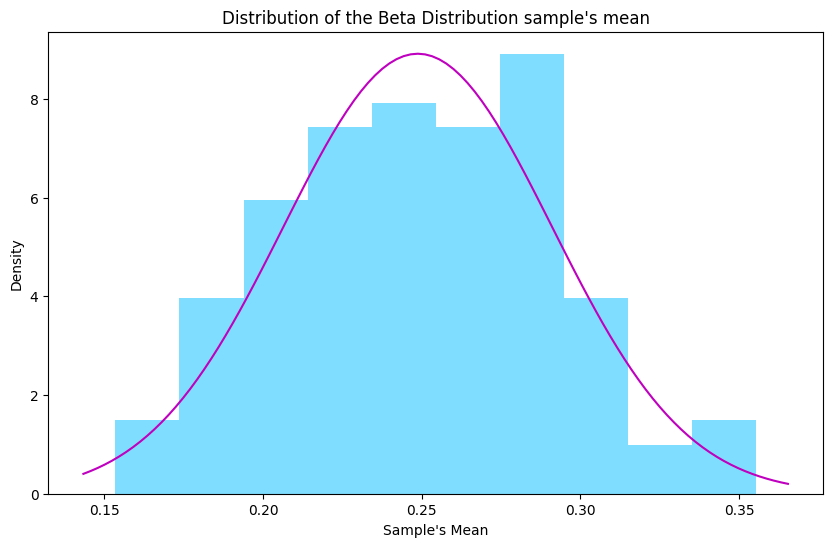

In [ ]:
SAMPLING_RATE = 100
SAMPLE_SIZE = 5
beta_distribution_mean_sampling(SAMPLING_RATE, SAMPLE_SIZE)

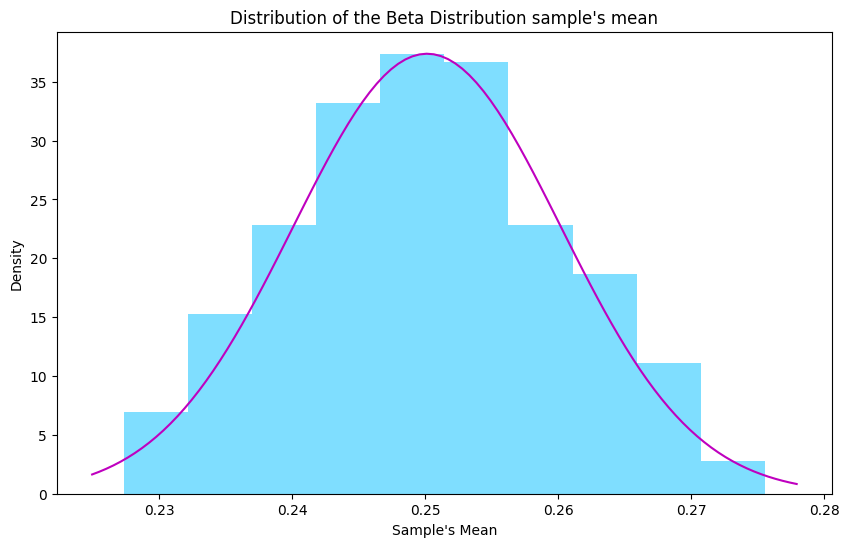

In [ ]:
SAMPLING_RATE = 300
SAMPLE_SIZE = 100
beta_distribution_mean_sampling(SAMPLING_RATE, SAMPLE_SIZE)

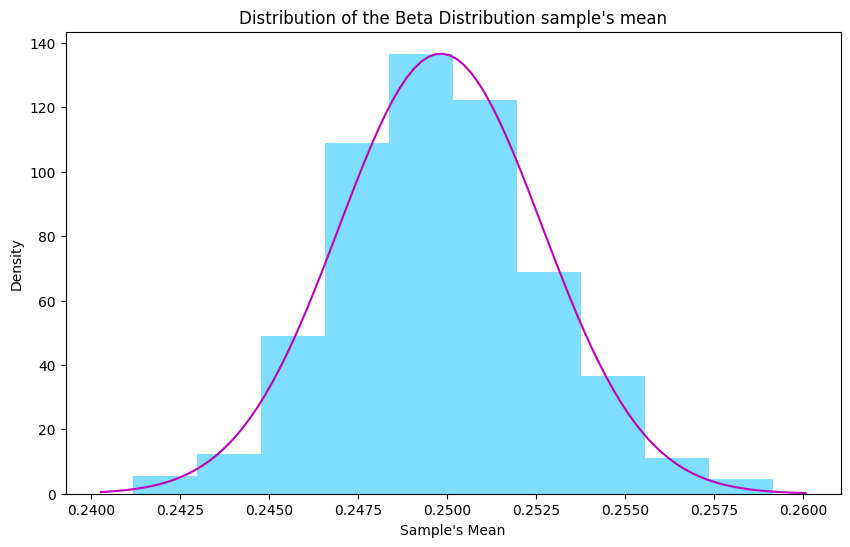

In [ ]:
SAMPLING_RATE = 500
SAMPLE_SIZE = 1000
beta_distribution_mean_sampling(SAMPLING_RATE, SAMPLE_SIZE)

### Analysis

As we can see in all 3 distribution's that we provided here, the mean of independant samples from each distribution with the sample size of larger than 30, the mean of samples can be modeled as a normal distribution.  

## Hypothesis Testing

### Unfair Coin

In [ ]:
def flipping_a_coin(p_head: float) -> str:
    if random.random() > p_head:
        return 'Tail'
    else:
        return 'Head'

In [ ]:
def coin_flipping_simulator(n_rounds) -> None:

    p_head = 0.55
    p_tail = 0.45

    head_count = 0
    tail_count = 0
    for i in range(0, n_rounds):
        if flipping_a_coin(p_head) == 'Head':
            head_count += 1
        else:
            tail_count += 1
            
    print(f"Ratio of observing head face in {n_rounds} rounds:", float(head_count/n_rounds))
    return head_count

In [ ]:
def calculate_p_value(observed_heads, n_rounds):
    # Assuming null hypothesis: the coin is fair
    # Calculate p-value using binomial test
    binomtestresult = binomtest(observed_heads, n=n_rounds, p=0.5, alternative='greater')
    alpha = 0.05
    print("\n-------------------- P-Value Testing --------------------")
    print(f"P-value test (binomtest) result: {binomtestresult}")
    if binomtestresult.pvalue < alpha:
        print(f"The P-value is {binomtestresult.pvalue}, lower than alhpha={alpha}, thus the null hypothesis is rejected")
    else:
        print(f"The P-value is {binomtestresult.pvalue}, higher than alhpha={alpha}, thus the null hypothesis can not be rejected")


In [ ]:
def calculate_confidence_interval(observed_heads, n_rounds):
	FAIR_HEAD_PROB =  0.5

	mean = observed_heads / n_rounds
	std_dev = math.sqrt(n_rounds*(observed_heads / n_rounds)*(1 - (observed_heads / n_rounds)))
	margin_of_error = 1.96 * (std_dev / np.sqrt(n_rounds))
	lower_bound = mean - margin_of_error
	upper_bound = mean + margin_of_error

	print("\n-------------------- Confidence Interval Testing --------------------")
	print(f"Lower bound: {lower_bound}")
	print(f"Upper bound: {upper_bound}")
	print("Z-score:", (observed_heads/n_rounds - FAIR_HEAD_PROB) / std_dev)

	if (FAIR_HEAD_PROB > lower_bound and FAIR_HEAD_PROB < upper_bound):
		print(f"Null hypothesis in inside of the 95'%' confidence interval, thus we can not reject the null hypothesis")
	else:
		print(f"Null hypothesis in outside of the 95'%' confidence interval, thus we can not reject the null hypothesis")

	return (lower_bound, upper_bound)
    

#### Simulation

In [ ]:
n_rounds = 30
head_count = coin_flipping_simulator(n_rounds)
calculate_p_value(head_count, n_rounds)
calculate_confidence_interval(head_count, n_rounds)

Ratio of observing head face in 30 rounds: 0.43333333333333335

-------------------- P-Value Testing --------------------
P-value test (binomtest) result: BinomTestResult(k=13, n=30, alternative='greater', statistic=0.43333333333333335, pvalue=0.8192026959732175)
The P-value is 0.8192026959732175, higher than alhpha=0.05, thus the null hypothesis can not be rejected

-------------------- Confidence Interval Testing --------------------
Lower bound: -0.5379164914914756
Upper bound: 1.4045831581581423
Z-score: -0.02456253753945373
Null hypothesis in inside of the 95'%' confidence interval, thus we can not reject the null hypothesis


(-0.5379164914914756, 1.4045831581581423)

In [ ]:
n_rounds = 100
head_count = coin_flipping_simulator(n_rounds)
calculate_p_value(head_count, n_rounds)
calculate_confidence_interval(head_count, n_rounds)

Ratio of observing head face in 100 rounds: 0.55

-------------------- P-Value Testing --------------------
P-value test (binomtest) result: BinomTestResult(k=55, n=100, alternative='greater', statistic=0.55, pvalue=0.18410080866334788)
The P-value is 0.18410080866334788, higher than alhpha=0.05, thus the null hypothesis can not be rejected

-------------------- Confidence Interval Testing --------------------
Lower bound: -0.4250876883644875
Upper bound: 1.5250876883644877
Z-score: 0.01005037815259213
Null hypothesis in inside of the 95'%' confidence interval, thus we can not reject the null hypothesis


(-0.4250876883644875, 1.5250876883644877)

In [ ]:
n_rounds = 1000
head_count = coin_flipping_simulator(n_rounds)
calculate_p_value(head_count, n_rounds)
calculate_confidence_interval(head_count, n_rounds)

Ratio of observing head face in 1000 rounds: 0.533

-------------------- P-Value Testing --------------------
P-value test (binomtest) result: BinomTestResult(k=533, n=1000, alternative='greater', statistic=0.533, pvalue=0.019889640107470602)
The P-value is 0.019889640107470602, lower than alhpha=0.05, thus the null hypothesis is rejected

-------------------- Confidence Interval Testing --------------------
Lower bound: -0.44486323051846055
Upper bound: 1.5108632305184606
Z-score: 0.002091663871554373
Null hypothesis in inside of the 95'%' confidence interval, thus we can not reject the null hypothesis


(-0.44486323051846055, 1.5108632305184606)

#### Analysis

We decide on the correctness of the Null claims about the fairness of the coin by using Hypotheses Testing and Confidence Interval evaluation. The more the sample size, the more accurate our observation will be, thus we can rely more on our decision on the hypothesis/condfidencee interval testing.  

As we can see in the unfair coin section, the P-Value method cannot reject the null hypothesis when we have 30 and 100 samples. However, when we capture 1000 samples, we can reject the null hypothesis by using the P-Value method. On the other hand, we can not reject the null hypothesis by using the 95% confidence interval, becuase of the fact that in our simulation, the standard deviation of our samples is so high, thus the confidence interval is so large and cover the null hypothesis in all samplings with the sizes of 30,100, and 1000.

### Job Placement

A t-test is a statistical test used to determine if there is a significant difference between the means of two groups or samples.  
In this test, we first calculate the t-statistic for the two groups or samples and then calculate the probability of having this t-statistic using the t-distribution. In the end, we only need to compare the p-value with our significance level($\alpha$) and make our decision.

There is a common belief that working alongside studying has a negative impact on their grades. We are given a job placement dataset that contains information about students studying in USA various universities alongside their job status.  
In this section, we are going to perform a t-test to test whether this belief is true or not. In our test, we suppose that variance is unknown but equal for both groups.

#### Data Preparation

In [3]:
DATA_PATH = 'job_placement.csv'
job_placement_df = pd.read_csv(DATA_PATH)
job_placement_df.head()

,id,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience
0,1,John Doe,Male,25,Bachelor's,Computer Science,Harvard University,Placed,60000,3.7,2.0
1,2,Jane Smith,Female,24,Bachelor's,Electrical Engineering,Massachusetts Institute of Technology,Placed,65000,3.6,1.0
2,3,Michael Johnson,Male,26,Bachelor's,Mechanical Engineering,Stanford University,Placed,58000,3.8,3.0
3,4,Emily Davis,Female,23,Bachelor's,Information Technology,Yale University,Not Placed,0,3.5,2.0
4,5,David Brown,Male,24,Bachelor's,Computer Science,Princeton University,Placed,62000,3.9,2.0


In [4]:
job_placement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   700 non-null    int64  
 1   name                 700 non-null    object 
 2   gender               700 non-null    object 
 3   age                  700 non-null    int64  
 4   degree               700 non-null    object 
 5   stream               700 non-null    object 
 6   college_name         700 non-null    object 
 7   placement_status     700 non-null    object 
 8   salary               700 non-null    int64  
 9   gpa                  700 non-null    float64
 10  years_of_experience  699 non-null    float64
dtypes: float64(2), int64(3), object(6)
memory usage: 60.3+ KB


In [5]:
job_placement_df.describe()

,id,age,salary,gpa,years_of_experience
count,700.00000,700.000000,700.000000,700.000000,699.000000
mean,350.50000,24.411429,52474.285714,3.750429,2.177396
std,202.21688,1.164268,25160.331005,0.121212,0.779393
min,1.00000,23.000000,0.000000,3.400000,1.000000
25%,175.75000,23.000000,61000.000000,3.700000,2.000000
50%,350.50000,24.000000,64000.000000,3.800000,2.000000
75%,525.25000,26.000000,66000.000000,3.900000,3.000000
max,700.00000,26.000000,68000.000000,3.900000,3.000000


Now we need to split students into two groups based on their job status.

In [6]:
placed_df = job_placement_df.groupby('placement_status').get_group('Placed')
not_placed_df = job_placement_df.groupby('placement_status').get_group('Not Placed') 
print(f'Placed Students Count: {len(placed_df)}\nNot Placed Students Count: {len(not_placed_df)}')

Placed Students Count: 570
Not Placed Students Count: 130


#### Preliminary Check

In [42]:
MAX_GPA = 4.0

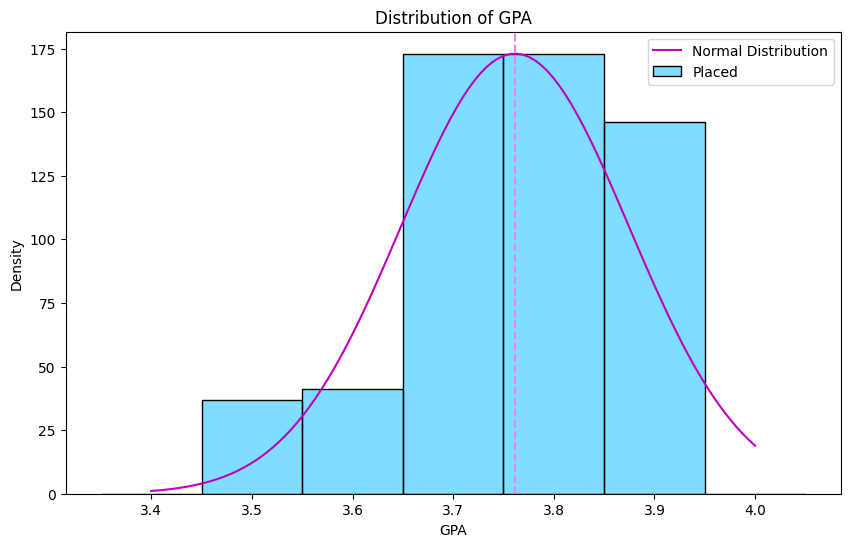

In [49]:
plt.figure(figsize=(10, 6))
bin_ticks = [x / 10 for x in range(int(min(placed_df['gpa'])*10 - 1), int(MAX_GPA*10 + 2))]
bin_edges = [x - 0.05 for x in bin_ticks]
sns.histplot(placed_df['gpa'], color='deepskyblue', label='Placed', bins=bin_edges, alpha=0.5)
plt.xticks(bin_ticks)
plt.axvline(placed_df['gpa'].mean(), color='violet', alpha=1, linestyle='dashed')
mu, std = placed_df['gpa'].mean(), placed_df['gpa'].std()
x = np.linspace(min(job_placement_df['gpa']), MAX_GPA, 100)
y_placed = norm.pdf(x, mu, std)
y_placed = y_placed * max(placed_df['gpa'].value_counts()) / max(y_placed)
plt.plot(x, y_placed, label='Normal Distribution', color='m')
plt.xlabel('GPA')
plt.ylabel('Density')
plt.title('Distribution of GPA')
plt.legend()
plt.show()


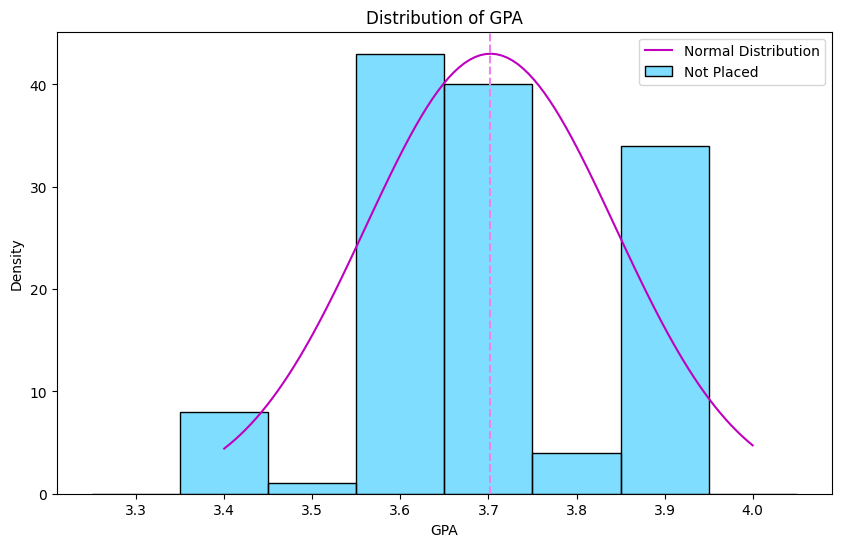

In [50]:
plt.figure(figsize=(10, 6))
bin_ticks = [x / 10 for x in range(int(min(not_placed_df['gpa'])*10 - 1), int(MAX_GPA*10 + 2))]
bin_edges = [x - 0.05 for x in bin_ticks]
sns.histplot(not_placed_df['gpa'], color='deepskyblue', label='Not Placed', bins=bin_edges, alpha=0.5)
plt.xticks(bin_ticks)
plt.axvline(not_placed_df['gpa'].mean(), color='violet', alpha=1, linestyle='dashed')
mu, std = not_placed_df['gpa'].mean(), not_placed_df['gpa'].std()
x = np.linspace(min(job_placement_df['gpa']), MAX_GPA, 100)
y_not_placed = norm.pdf(x, mu, std)
y_not_placed = y_not_placed * max(not_placed_df['gpa'].value_counts()) / max(y_not_placed)
plt.plot(x, y_not_placed, label='Normal Distribution', color='m')
plt.xlabel('GPA')
plt.ylabel('Density')
plt.title('Distribution of GPA')
plt.legend()
plt.show()


#### T-Statisitc Calculation

##### From Scratch

First, we need to calculate the t-value. We can do this by using the following formula:
$$ t = \frac{\bar{x}_1 - \bar{x}_2}{s_{\bar{x}_1 - \bar{x}_2}} $$ 
where:
- $\bar{x}_1$ and $\bar{x}_2$ are the means of the two groups
- $s_{\bar{x}_1 - \bar{x}_2}$ is the standard error of the difference between the means of the two groups

The standard error of the difference between the means of the two groups can be calculated by the following formula:
$$ s_{\bar{x}_1 - \bar{x}_2} = s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}} $$
where $s_p$ is the pooled standard deviation or estimated standard deviation of the population

The pooled standard deviation can be calculated by the following formula:
$$ s_p = \sqrt{\frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}} $$
where:
- $s_1$ and $s_2$ are the standard deviations of the two groups
- $n_1$ and $n_2$ are the number of samples in the two groups

In [7]:
n_1 = len(placed_df)
n_2 = len(not_placed_df)
s_1 = placed_df['gpa'].std()
s_2 = not_placed_df['gpa'].std()

In [8]:
s_p = np.sqrt(((n_1 - 1) * s_1**2 + (n_2 - 1) * s_2**2) / (n_1 + n_2 - 2))


In [9]:
x1_mean = np.mean(placed_df['gpa'])
x2_mean = np.mean(not_placed_df['gpa'])

In [11]:
t_value_from_scratch = (x1_mean - x2_mean) / (s_p * np.sqrt((1/n_1) + (1/n_2)))
print(f'The t-value is: {t_value_from_scratch}')

The t-value is: 5.105318956468754


In [12]:
degrees_of_freedom = n_1 + n_2 - 2
print(f'The degrees of freedom equals {degrees_of_freedom}')

The degrees of freedom equals 698


#### P-Value Calculation

Now we need to calculate the p-value. We will use the t-distribution to calculate the p-value. The p-value is the probability of observing a t-statistic as extreme as the one we have calculated, given that the null hypothesis is true.

In [13]:
p_value_from_scratch =  1 - t.cdf(abs(t_value_from_scratch), degrees_of_freedom)
print(f"The p-value is: {p_value_from_scratch}")

The p-value is: 2.1318222476196524e-07


#### Performing the t-test using `scipy`

Now we are going to perform the t-test using the `scipy` library. We will use the `ttest_ind` function from the `scipy.stats` module to perform the t-test.

In [14]:
t_value_scipy, p_value_scipy = ttest_ind(placed_df['gpa'], not_placed_df['gpa'])
p_value_scipy /= 2
print(f'The t-value is: {t_value_scipy}')
print(f"The p-value is: {p_value_scipy}")

The t-value is: 5.105318956468754
The p-value is: 2.1318222470483946e-07


#### Analysis

As we can see, the calculated t-value and p-values from scratch and using the `scipy` library are almost the same.

Also as we can see from the results, the p-value is way less than our significance level($\alpha$), which is 0.05. So, we can reject the null hypothesis and conclude that there is a significant difference between the means of the two groups. So, we can say that working alongside studying has a negative impact on the grades of the students.

## Questions

### Q1

Read a little bit about the applications of Monte Carlo Simulation in real life. What are some of these applications?


* **Drug Discovery**  
	Simulating how molecules interact can be a huge time saver in drug development. By running millions of virtual scenarios, researchers can identify promising drug candidates for further testing.

* **Portfolio Risk Management**  
	Investors and fund managers use Monte Carlo simulation to assess portfolio risk and optimize asset allocation strategies. It helps in estimating the potential range of investment returns, evaluating diversification benefits, and constructing portfolios that meet risk-return objectives.

* **Climate Modeling**  
	Climate scientists use Monte Carlo simulation to model the Earth's climate system, predict future climate scenarios, and assess the impact of greenhouse gas emissions. It helps in understanding climate dynamics, projecting changes in temperature and precipitation patterns, and informing climate policy decisions.

* **Insurance Risk Assessment**  
	Insurance companies use Monte Carlo simulation to assess and manage various risks, including insurance claims, natural disasters, and financial market volatility. It helps insurers in pricing insurance policies, determining reserves, and evaluating solvency under different scenarios.

* **Project Management**  
	Large projects often have uncertainties, like unexpected delays or material cost increases. A Monte Carlo simulation can factor in these possibilities to estimate the likelihood of staying on budget and schedule.


### Q2

How does the sample size affect your plots in part 2(CLT)? What can you understand from these plots?

Low sample size will result in covering the distribution domain incompletely, thus the output plots cannot be modeled well by using the CLT theorem (since our samples has bias). By increasing the size of our samples, we reduce the bias in our sampling thus and we see that the output plots of the samples's means can be modeled by a normal distribution, just as the CLT theorem presents.

### Q3

How does increasing the sample size affect your coin test?

The more the sample size, the more accurate the real probability of observing head and tails will be resulted, thus we can rely more on our observation in order to perform hypothesis tests and evalutions based on using confidence intervals.

As we can see in the unfair coin section, the P-Value method cannot reject the null hypothesis when we have 30 and 100 samples. However, when we capture 1000 samples, we can reject the null hypothesis by using the P-Value method. On the other hand, we can not reject the null hypothesis by using the 95% confidence interval, becuase of the fact that in our simulation, the standard deviation of our samples is so high, thus the confidence interval is so large and cover the null hypothesis in all samplings with the sizes of 30, 100, and 1000.

### Q4

What are t-statistic, degrees of freedom, and t-distribution in t-test? How can they help us to compare two data sets?

* **T-Statistic (t)**  
	The t-statistic is a measure of the difference between the means of two groups relative to the variance within the groups. It is calculated as the difference between the sample means divided by the standard error of the difference between the means. The t-statistic quantifies the strength of the evidence against the null hypothesis and is used to determine the statistical significance of the difference between the means of the two groups.  
	The t-statistic provides a standardized measure of the difference between the sample means, taking into account the variability and sample sizes. A larger t-statistic (in absolute value) suggests a more significant difference between the means.

* **Degrees of Freedom (df)**  
	The degrees of freedom represent the number of independent observations in a sample that are available to estimate a parameter. In the context of a t-test, the degrees of freedom are calculated as the sum of the sample sizes of the two groups minus 2. The degrees of freedom determine the shape of the t-distribution and are used to calculate the p-value for the t-test.  
	The degrees of freedom are used to determine the appropriate t-distribution for calculating the p-value and making inferences about the observed difference.

* **T-Distribution**  
	The t-distribution is a probability distribution that is used to model the distribution of the t-statistic under the null hypothesis. It is similar to the normal distribution but has heavier tails, which accounts for the increased uncertainty in estimating the population variance from a sample. The t-distribution is used to calculate the p-value for the t-test and determine the statistical significance of the difference between the means of the two groups. As the degrees of freedom increase, the t-distribution approaches the shape of the standard normal distribution (z-distribution).  
	The t-distribution is used to calculate the p-value, which allows us to determine the statistical significance of the observed difference between the means. If the p-value is less than a predetermined significance level (e.g., 0.05), we can conclude that the difference between the means is statistically significant, and we can reject the null hypothesis.

### Q5

What are the preliminary conditions for using t-test on our data?

* **Independent Samples**  
	The samples in each group must be independent of each other. This means that the observations in one group should not be related to or influenced by the observations in the other group. If the samples are not independent, the assumptions of the t-test may be violated, and the results may be biased.

* **Normality**  
	The data in each group should be approximately normally distributed. While the t-test is robust to violations of normality for large sample sizes, it is important to check the distribution of the data to ensure that the assumptions of the t-test are met. If the data are highly skewed or have outliers, the t-test results may be unreliable.  
	We can assess normality using visual methods like histograms and Q-Q plots or statistical tests like Shapiro-Wilk test.

* **Equal Variances (Homoscedasticity)**  
	The variances of the two groups should be approximately equal. This assumption is known as homogeneity of variances. If the variances are not equal, the t-test may be biased, and alternative methods such as Welch's t-test or the Mann-Whitney U test may be more appropriate.

* **Continuous Data**  
	The data being compared should be continuous or interval/ratio scaled. This means the data points represent ordered categories with meaningful differences between them. Nominal or ordinal data with discrete categories is not suitable for t-tests.

* **Random Sampling**  
	The samples should be selected randomly from the population of interest. This helps to ensure that the results of the t-test are generalizable to the larger population and are not biased by the sampling method.


### Q6

Read about some other types of tests that are used in scientific research. Write a line about each of them.

* **Chi-Square Test**  
	The chi-square test is a statistical test used to determine whether there is a significant association between two categorical variables. It is commonly used to analyze contingency tables and assess the independence of variables. The test calculates the difference between the observed and expected frequencies of the categories and determines whether this difference is statistically significant.

* **ANOVA (Analysis of Variance)**  
	ANOVA is a statistical test used to compare the means of three or more groups to determine if there are statistically significant differences between them. It is used to test hypotheses about the equality of means across multiple groups and can identify which groups differ from each other. ANOVA assesses the variation within and between groups to determine if the differences are due to random variation or actual differences in the population.

* **Mann-Whitney U Test (Wilcoxon Rank-Sum Test)**   
	The Mann-Whitney U test is a nonparametric test used to compare the medians of two independent samples. It is used when the data do not meet the assumptions of the t-test, such as normality or equal variances. The test ranks the data from both samples, calculates the U statistic, and determines whether the medians are significantly different. The Mann-Whitney U test is robust to violations of normality and is suitable for ordinal or non-normally distributed data.

* **Regression Analysis**  
	Regression analysis is a statistical technique used to model the relationship between a dependent variable and one or more independent variables. It is used to predict the value of the dependent variable based on the values of the independent variables. Regression analysis can be used for prediction, hypothesis testing, and understanding the relationships between variables. Common types of regression include linear regression, logistic regression, and multiple regression.

* **Correlation Analysis**  
	Correlation analysis is a statistical method used to measure the strength and direction of the relationship between two continuous variables. It calculates the correlation coefficient, which indicates the degree of association between the variables. Correlation analysis can help identify patterns, trends, and dependencies in the data and is used to assess the linear relationship between variables.

* **Survival Analysis**  
	Survival analysis is a statistical method used to analyze time-to-event data, such as time until death, failure, or occurrence of an event. It is commonly used in medical research, epidemiology, and engineering to estimate survival probabilities and hazard rates over time. Survival analysis accounts for censoring, where some individuals do not experience the event of interest during the study period, and can model the time-to-event data using techniques like Kaplan-Meier estimation and Cox proportional hazards regression.

* **Cluster Analysis**  
	Cluster analysis is a statistical method used to group similar objects or data points into clusters based on their characteristics or attributes. It is used in data mining, pattern recognition, and machine learning to identify patterns, structures, and relationships in the data. Cluster analysis can help discover hidden patterns in the data, segment populations, and classify objects into meaningful groups based on their similarities.
